In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, f1_score, mean_squared_error


import mlflow
import mlflow.sklearn

import joblib

In [3]:
mlflow.set_experiment("Flight Ticket Predication Model")

2024/10/25 23:23:25 INFO mlflow.tracking.fluent: Experiment with name 'Flight Ticket Predication Model' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///home/hiep/Downloads/Learn-all/django/event-steamer/data-pipeline/Flight-price-prediction/mlruns/757764291671948317', creation_time=1729873405283, experiment_id='757764291671948317', last_update_time=1729873405283, lifecycle_stage='active', name='Flight Ticket Predication Model', tags={}>

In [4]:
path = (r"./Flight Price Prediction.csv")

df = pd.read_csv(path)

In [6]:
df = df.drop('Unnamed: 0',axis = 1,inplace=False)
df.shape

(300153, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
# Unique values in different columns
airline = df.airline.nunique()
flight = df.flight.nunique()
source_city = df.source_city.nunique()
departure_time = df.departure_time.nunique()
stops = df.stops.nunique()
arrival_time = df.arrival_time.nunique()

# Print unique values
print(f'Unique airline is:', airline)
print(f'Unique flight is:', flight)
print(f'Unique source_city is:', source_city)
print(f'Unique departure_time is:', departure_time)
print(f'Unique stops:', stops)
print(f'arrival_time:', arrival_time)

Unique airline is: 6
Unique flight is: 1561
Unique source_city is: 6
Unique departure_time is: 6
Unique stops: 3
arrival_time: 6


In [11]:
numeric_col = df.select_dtypes(include=['float', 'int64'])
character_col = df.select_dtypes(include = ['object'])

In [12]:
numeric_col.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


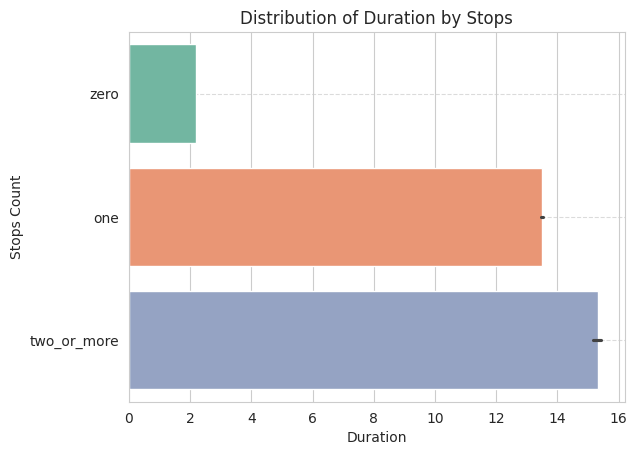

<Figure size 800x600 with 0 Axes>

In [14]:
sns.barplot(data=df, x="duration", y="stops", palette="Set2")

plt.title("Distribution of Duration by Stops")  
plt.xlabel("Duration") 
plt.ylabel("Stops Count") 
# plt.xticks(rotation=45)  
sns.set_style("whitegrid") 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.figure(figsize=(8, 6))  

plt.tight_layout()  
plt.show()

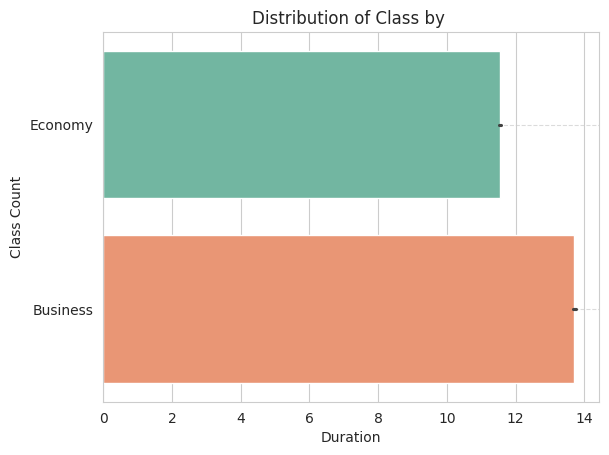

<Figure size 800x600 with 0 Axes>

In [15]:
sns.barplot(data=df, x="duration", y="class", palette="Set2")

plt.title("Distribution of Class by ")  
plt.xlabel("Duration") 
plt.ylabel("Class Count") 
# plt.xticks(rotation=45)  
sns.set_style("whitegrid") 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.figure(figsize=(8, 6))  

plt.tight_layout()  
plt.show()

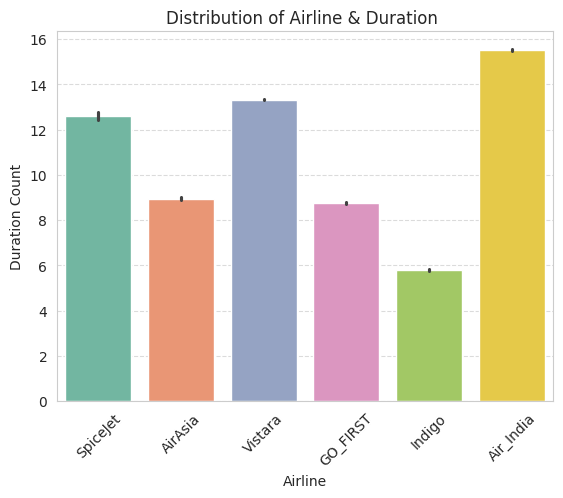

<Figure size 800x600 with 0 Axes>

In [16]:
sns.barplot(data=df, x="airline", y="duration", palette="Set2")

plt.title("Distribution of Airline & Duration ")  
plt.xlabel("Airline") 
plt.ylabel("Duration Count") 
plt.xticks(rotation=45)  
sns.set_style("whitegrid") 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.figure(figsize=(8, 6))  

plt.tight_layout()  
plt.show()

In [17]:
# Encoding
airline_encode = LabelEncoder()
flight_encode = LabelEncoder()
source_city_encode = LabelEncoder()
departure_time_encode = LabelEncoder()
stops_encode = LabelEncoder()
arrival_time_encode = LabelEncoder()
destination_city_encode = LabelEncoder()
class_encode = LabelEncoder()

df['airline'] = airline_encode.fit_transform(df['airline'])
df['flight'] = flight_encode.fit_transform(df['flight'])
df['source_city'] = source_city_encode.fit_transform(df['source_city'])
df['departure_time'] = departure_time_encode.fit_transform(df['departure_time'])
df['stops'] = stops_encode.fit_transform(df['stops'])
df['arrival_time'] = arrival_time_encode.fit_transform(df['arrival_time'])
df['destination_city'] = destination_city_encode.fit_transform(df['destination_city'])
df['class'] = class_encode.fit_transform(df['class'])

In [18]:
# Split data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Train Model with mlflow

with mlflow.start_run():
    model = DecisionTreeRegressor(criterion='squared_error',
    splitter='random',
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=3,)
    
    model.fit(X_train, y_train)

In [21]:
score = model.score(X_train, y_train)*100, model.score(X_test, y_test)*100

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

In [23]:
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f'Model Score:{score}')

R2 Score: 0.9843793959257915
Mean Squared Error: 7975556.875594148
Mean Absolute Error: 1151.447355306141
Model Score:(99.15343268841136, 98.45279706315088)


In [24]:
mlflow.log_metric('Mean Squared Error', mse)
mlflow.log_metric('Absolute Mean Error',mae)
mlflow.log_metric('R2 Score', r2)

In [25]:
mlflow.log_param('criterian','squared_error')
mlflow.log_param('splitter','random')
mlflow.log_param('max_depth',None)
mlflow.log_param('min_samples_split',4)
mlflow.log_param('min_samples_leaf',4)

4

In [26]:
mlflow.set_tag("Model type", 'Regression model')
mlflow.set_tag('algorithm', 'Decesion Tree Regressor')
mlflow.set_tag('Data Size', len(df))
mlflow.set_tag('Random_State','42')
mlflow.sklearn.log_model(model,'Decesion Tree')

2024/10/25 23:29:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [27]:
mlflow.end_run(status="FINISHED")

In [28]:
joblib.dump(airline_encode,'airline_encode')
joblib.dump(flight_encode,'flight_encode')
joblib.dump(source_city_encode,'source_city_encode')
joblib.dump(departure_time_encode,'departure_time_encode')
joblib.dump(stops_encode,'stops_encode')
joblib.dump(arrival_time_encode,'arrival_time_encode')
joblib.dump(destination_city_encode,'destination_city_encode')
joblib.dump(class_encode,'class_encode')
joblib.dump(model, 'flight_model.joblib')

['flight_model.joblib']